In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import random 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

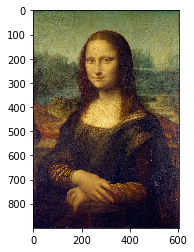

In [2]:
#plot the original image
img = mpimg.imread('Mona_Lisa.jpg') 
plt.imshow(img) 
plt.show()

In [3]:
#select 5000 random x,y coordinates for training locations
xy_coords = []

for i in range(5000):
    x_val = random.randrange(0, 604)
    y_val = random.randrange(0,900)
    tup = (x_val, y_val)
    xy_coords.append(tup)

In [4]:
#convert the image pixel values to grayscale 
#https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
grayscale = []

for i in range(900):
    for j in range(604):
        rgb = img[i][j]
        r = img[i][j][0]
        g = img[i][j][1]
        b = img[i][j][2]
        grayscale_val = 0.2989*r + 0.5870*g + 0.1140*b 
        grayscale.append(grayscale_val)
        
grayscale = np.array(grayscale)
grayscale = np.reshape(grayscale,(900,604))

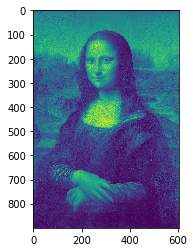

In [5]:
#plot the grayscale image of the Mona Lisa
plt.imshow(grayscale) 
plt.show()

In [6]:
#create a list storing the grayscale pixel values for the training coordinates
training_grayscale = []
for i in range(5000):
    x_val = xy_coords[i][0]
    y_val = xy_coords[i][1]
    grayscale_val = grayscale[y_val][x_val]
    training_grayscale.append(grayscale_val)

In [7]:
#Sample Random Forest regression with max depth = 7
regr = RandomForestRegressor(max_depth=7, random_state=0,n_estimators=20)
regr.fit(xy_coords, training_grayscale) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [8]:
#create a list of all x,y coordinates for the image
all_coords = []

for i in range(900):
    for j in range(604):
        all_coords.append((j,i))

In [9]:
#predict the image based on the training parameters above
test_pred = regr.predict(all_coords)
test_pred = np.array(test_pred)
test_pred = np.reshape(test_pred,(900,604))

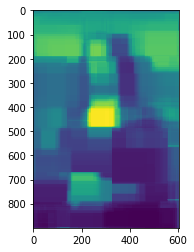

In [10]:
#show the image
plt.imshow(test_pred) 
plt.show()

In [11]:
#define a function to create a list of the prediction of the grayscale pixel values based on 
#the depth and number of tree parameters passed to the function
def rand_forest_predictor(depth, num_trees):
    regr = RandomForestRegressor(max_depth=depth, random_state=0,n_estimators=num_trees)
    regr.fit(xy_coords, training_grayscale) 
    test_pred = regr.predict(all_coords)
    test_pred = np.array(test_pred)
    test_pred = np.reshape(test_pred,(900,604))
    return test_pred

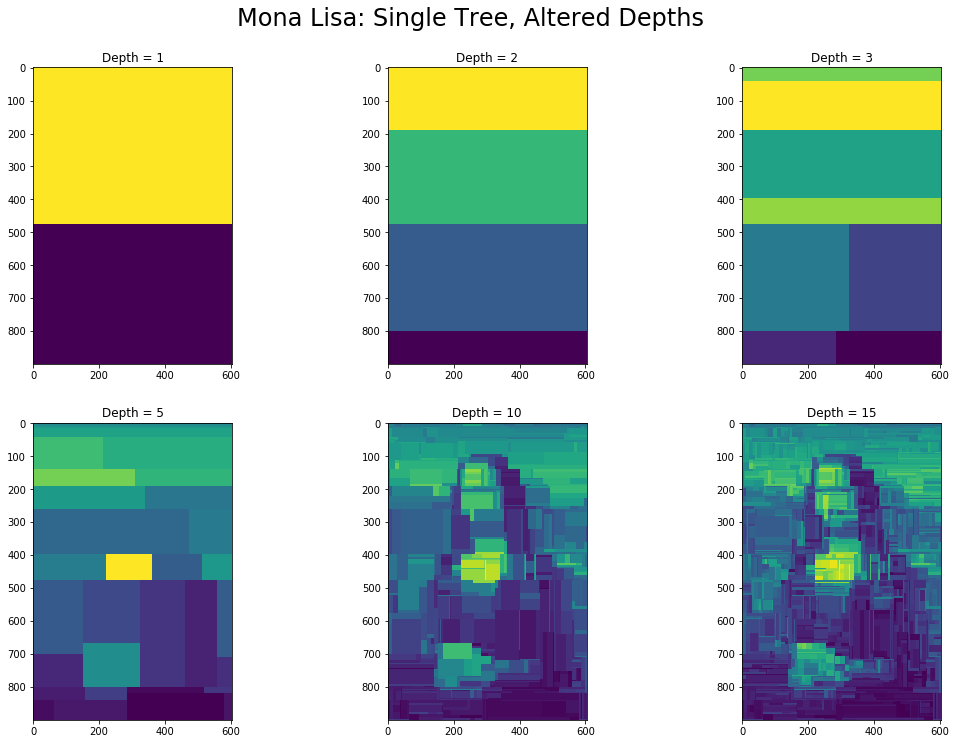

In [12]:
#create figure and subplots to display the predicted image for a single tree with altered depths
fig = plt.figure(figsize=(18,12))
fig.suptitle('Mona Lisa: Single Tree, Altered Depths', fontsize=24, y = 0.95)

depth_vals = [1,2,3,5,10,15]

for i in range(len(depth_vals)):
    to_plot = rand_forest_predictor(depth_vals[i], 1)
    plt.subplot(2, 3, i+1)
    plt.imshow(to_plot)
    title = 'Depth = ' + str(depth_vals[i])
    plt.title(title)

plt.show()

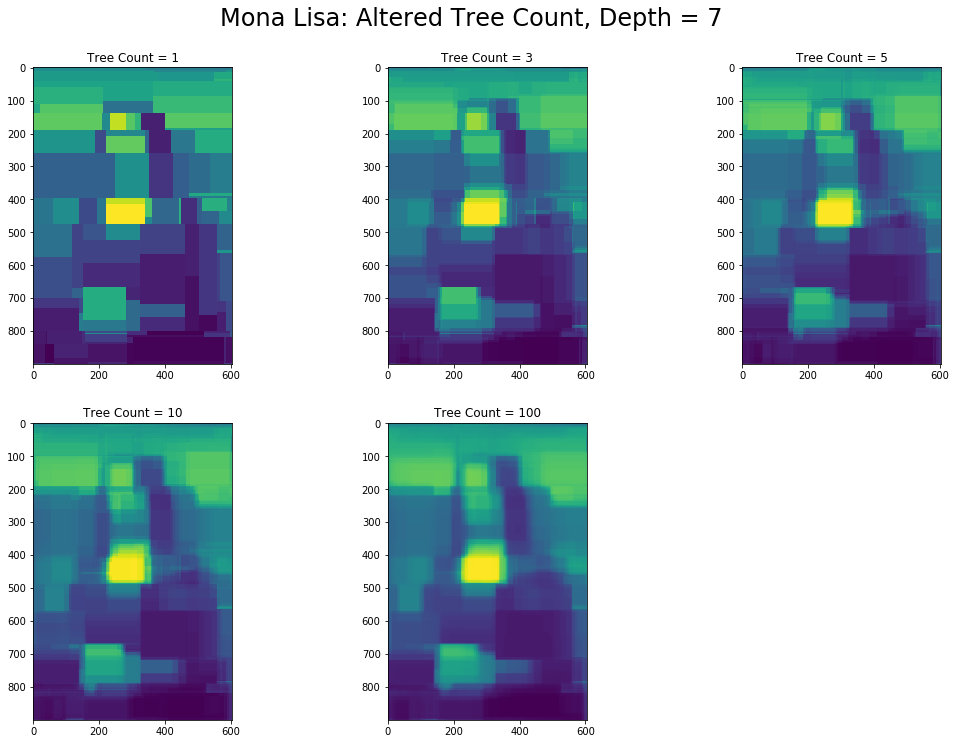

In [13]:
#create figure and subplots to display the predicted image for a single depth with altered tree counts
fig = plt.figure(figsize=(18,12))
fig.suptitle('Mona Lisa: Altered Tree Count, Depth = 7', fontsize=24, y = 0.95)

tree_count = [1,3,5,10,100]

for i in range(len(tree_count)):
    to_plot = rand_forest_predictor(7, tree_count[i])
    plt.subplot(2, 3, i+1)
    plt.imshow(to_plot)
    title = 'Tree Count = ' + str(tree_count[i])
    plt.title(title)

plt.show()

In [14]:
#predict what the image will look like with a kNN regressor with 1 neighbor
regr = KNeighborsRegressor(n_neighbors=1)
regr.fit(xy_coords, training_grayscale) 
test_pred = regr.predict(all_coords)
test_pred = np.array(test_pred)
test_pred = np.reshape(test_pred,(900,604))

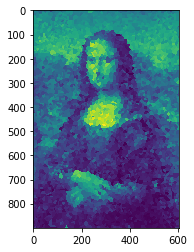

In [15]:
#display the predicted image for kNN regressor with neighbors = 1
plt.imshow(test_pred) 
plt.show()

In [16]:
####Below is support for parts E & F. Analysis

In [17]:
#leveraged implementation to evaluate decision rules for Random forest
#https://stackoverflow.com/questions/50600290/how-extraction-decision-rules-of-random-forest-in-python
def print_decision_rules(rf):

    for tree_idx, est in enumerate(rf.estimators_):
        tree = est.tree_
        assert tree.value.shape[1] == 1 # no support for multi-output

        print('TREE: {}'.format(tree_idx))

        iterator = enumerate(zip(tree.children_left, tree.children_right, tree.feature, tree.threshold, tree.value))
        for node_idx, data in iterator:
            left, right, feature, th, value = data           

            # for classifier, value is 0 except the index of the class to return
            class_idx = np.argmax(value[0])

            if left == -1 and right == -1:
                print('{} LEAF: return class={}'.format(node_idx, class_idx))
            else:
                print('{} NODE: if feature[{}] < {} then next={} else next={}'.format(node_idx, feature, th, left, right))    

In [18]:
#run a random forest regression with depth 5 for each of 2 trees
regr = RandomForestRegressor(max_depth=5, random_state=0,n_estimators=2)
regr.fit(xy_coords, training_grayscale)
test_pred = regr.predict(all_coords)
test_pred = np.array(test_pred)
test_pred = np.reshape(test_pred,(900,604))

In [19]:
#output the decision rules
print_decision_rules(regr)

TREE: 0
0 NODE: if feature[1] < 476.5 then next=1 else next=32
1 NODE: if feature[1] < 189.5 then next=2 else next=17
2 NODE: if feature[1] < 42.5 then next=3 else next=10
3 NODE: if feature[1] < 9.5 then next=4 else next=7
4 NODE: if feature[1] < 1.5 then next=5 else next=6
5 LEAF: return class=0
6 LEAF: return class=0
7 NODE: if feature[1] < 14.5 then next=8 else next=9
8 LEAF: return class=0
9 LEAF: return class=0
10 NODE: if feature[1] < 139.5 then next=11 else next=14
11 NODE: if feature[0] < 211.5 then next=12 else next=13
12 LEAF: return class=0
13 LEAF: return class=0
14 NODE: if feature[0] < 308.5 then next=15 else next=16
15 LEAF: return class=0
16 LEAF: return class=0
17 NODE: if feature[1] < 395.5 then next=18 else next=25
18 NODE: if feature[1] < 260.5 then next=19 else next=22
19 NODE: if feature[0] < 338.5 then next=20 else next=21
20 LEAF: return class=0
21 LEAF: return class=0
22 NODE: if feature[0] < 474.0 then next=23 else next=24
23 LEAF: return class=0
24 LEAF: ret

In [20]:
#store the number of unique values in the forest while testing different depths for one tree in the forest
#store the variance in that respective forest
#print the results
unique_vals = []
variance_vals = []
for i in range(1,100,10):
    regr = RandomForestRegressor(max_depth=i, random_state=0,n_estimators=1)
    regr.fit(xy_coords, training_grayscale)
    test_pred = regr.predict(all_coords)
    test_pred = np.array(test_pred)
    test_pred = np.reshape(test_pred,(900,604))
    unique_val = np.unique(test_pred).shape[0]
    unique_vals.append(unique_val)
    variance = np.var(test_pred)
    variance = round(variance,1)
    variance_vals.append(variance)

print(unique_vals)
print(variance_vals)

[2, 1037, 2917, 2933, 2933, 2933, 2933, 2933, 2933, 2933]
[937.7, 2420.2, 2535.0, 2526.9, 2526.9, 2526.9, 2526.9, 2526.9, 2526.9, 2526.9]


In [25]:
#store the number of unique values in the forest while testing different number of trees in the forest with a max depth of 8
#store the variance in that respective forest
#print the results
unique_vals = []
variance_vals = []
for i in range(1,11):
    regr = RandomForestRegressor(max_depth=3, random_state=0,n_estimators=i)
    regr.fit(xy_coords, training_grayscale)
    test_pred = regr.predict(all_coords)
    test_pred = np.array(test_pred)
    test_pred = np.reshape(test_pred,(900,604))
    unique_val = np.unique(test_pred).shape[0]
    unique_vals.append(unique_val)
    variance = np.var(test_pred)
    variance = round(variance,1)
    variance_vals.append(variance)

print(unique_vals)
print(variance_vals)

[8, 18, 32, 54, 73, 89, 115, 138, 172, 189]
[1291.5, 1230.1, 1223.2, 1208.1, 1195.8, 1193.1, 1192.4, 1188.9, 1183.4, 1183.5]


In [22]:
np_gray = np.array(training_grayscale)
print(np.unique(np_gray).shape[0])
print(np.var(np_gray))

4504
2501.2946169649176
